### a) Import the associated csv file. Do not use the 'fips' column (which you should import as str) as the index column. Make sure the 'Number_of_returns' and 'estimated_exams' columns are imported as 'Int64'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('auditsData_2019.04.03.csv', header=0, dtype={'fips': np.str, 'Number_of_returns': 'int64', 'estimated_exams': 'int64'})
df.head()

,fips,name,state,Number_of_returns,estimated_exams,audit_rate,audit_rate_trunk
0,01001,"Autauga County, Alabama",Alabama,95170,721,7.575917,7.575917
1,01003,"Baldwin County, Alabama",Alabama,362490,2833,7.815388,7.815388
2,01005,"Barbour County, Alabama",Alabama,39440,360,9.127789,9.127789
3,01007,"Bibb County, Alabama",Alabama,31840,260,8.165829,8.165829
4,01009,"Blount County, Alabama",Alabama,87970,673,7.650335,7.650335


### b) Create a list of the states using the data. Create two lists in which you store the number of tax returns and the number of estimated exams for each state, respectively. Create a dictionary my_dict with 'state', 'Number_of_returns', and 'estimated_exams' as keys and the three lists as the corresponding values. Create a new dataFrame from the dictionary using pd.DataFrame.from_dict(temp_dict).

In [4]:
states = df['state'].unique()
returns = (df[['Number_of_returns', 'state']].groupby('state').sum())['Number_of_returns'].tolist()
exams = (df[['estimated_exams', 'state']].groupby('state').sum())['estimated_exams'].tolist()


In [5]:
my_dict = {x[0]:list(x[1:]) for x in zip(states,returns,exams)}
new_df = pd.DataFrame.from_dict(my_dict)


In [6]:
new_df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,8199560,1445720,11321910,4892180,69245600,10122840,7001330,1769910,1340370,37564020,...,1652110,11688480,47598120,4855480,1291760,15426020,13312120,3130890,11228350,1143480
1,67237,10118,88969,39869,550618,74419,51712,12928,10492,308503,...,12017,92491,386203,35123,9174,116287,96271,23228,77764,8168


### c) Using the dataFrame from b), create a bar plot that shows the total number of tax returns per state. Without using the plot, determine and display the state that has the second lowest number of tax returns

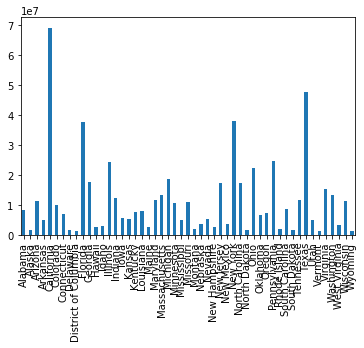

In [7]:
new_df.loc[0,:].plot.bar()

In [8]:
new_df.loc[0,:].sort_values(ascending=True)[1]

1291760

### d) For each state display the county with the highest and the lowest audit rate.

In [21]:
#highest = (df[['audit_rate', 'state']].groupby('state').max())['audit_rate'].tolist()
#lowest = (df[['audit_rate', 'state']].groupby('state').min())['audit_rate'].tolist()
#pd.DataFrame.from_dict({x[0]:list(x[1:]) for x in zip(states,highest,lowest)})

In [39]:
mins = (df[['audit_rate', 'state', 'name']].groupby('state').min())['name']
maxs = (df[['audit_rate', 'state', 'name']].groupby('state').max())['name']
pd.DataFrame({'min': mins, 'max': maxs})


,min,max
state,,
Alabama,"Autauga County, Alabama","Winston County, Alabama"
Alaska,"Aleutians East Borough, Alaska","Yukon-Koyukuk Census Area, Alaska"
Arizona,"Apache County, Arizona","Yuma County, Arizona"
Arkansas,"Arkansas County, Arkansas","Yell County, Arkansas"
California,"Alameda County, California","Yuba County, California"
Colorado,"Adams County, Colorado","Yuma County, Colorado"
Connecticut,"Fairfield County, Connecticut","Windham County, Connecticut"
Delaware,"Kent County, Delaware","Sussex County, Delaware"
District of Columbia,"District of Columbia, District of Columbia","District of Columbia, District of Columbia"


### e) Assume that a tax return that is not (closely) examined takes one minute to process, while a (closely) examined one takes one hour. How many work-years are required to process all tax returns in the dataFrame?

In [45]:
((df['estimated_exams'].multiply(60).sum()) + (df['Number_of_returns'].sum() - df['estimated_exams'].sum())) * 0.0000019025875190259

1621.013177321178